In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [12]:
df=pd.read_csv(r"C:\Users\chauh\Downloads\archive (1)\Cancer_Data.csv")

In [13]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [19]:
# check duplicated data
df.duplicated().sum()

0

In [20]:
# check null data
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [21]:
# drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

In [22]:
df.shape

(569, 31)

<Axes: xlabel='diagnosis', ylabel='count'>

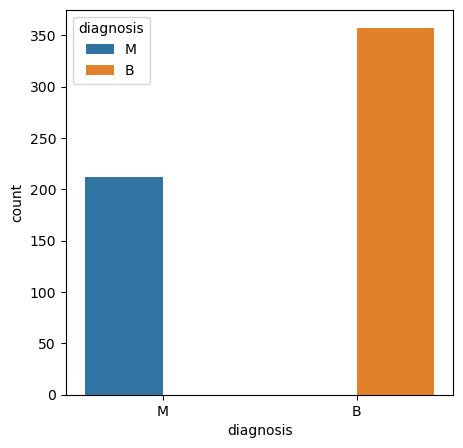

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x="diagnosis", data=df, hue="diagnosis")

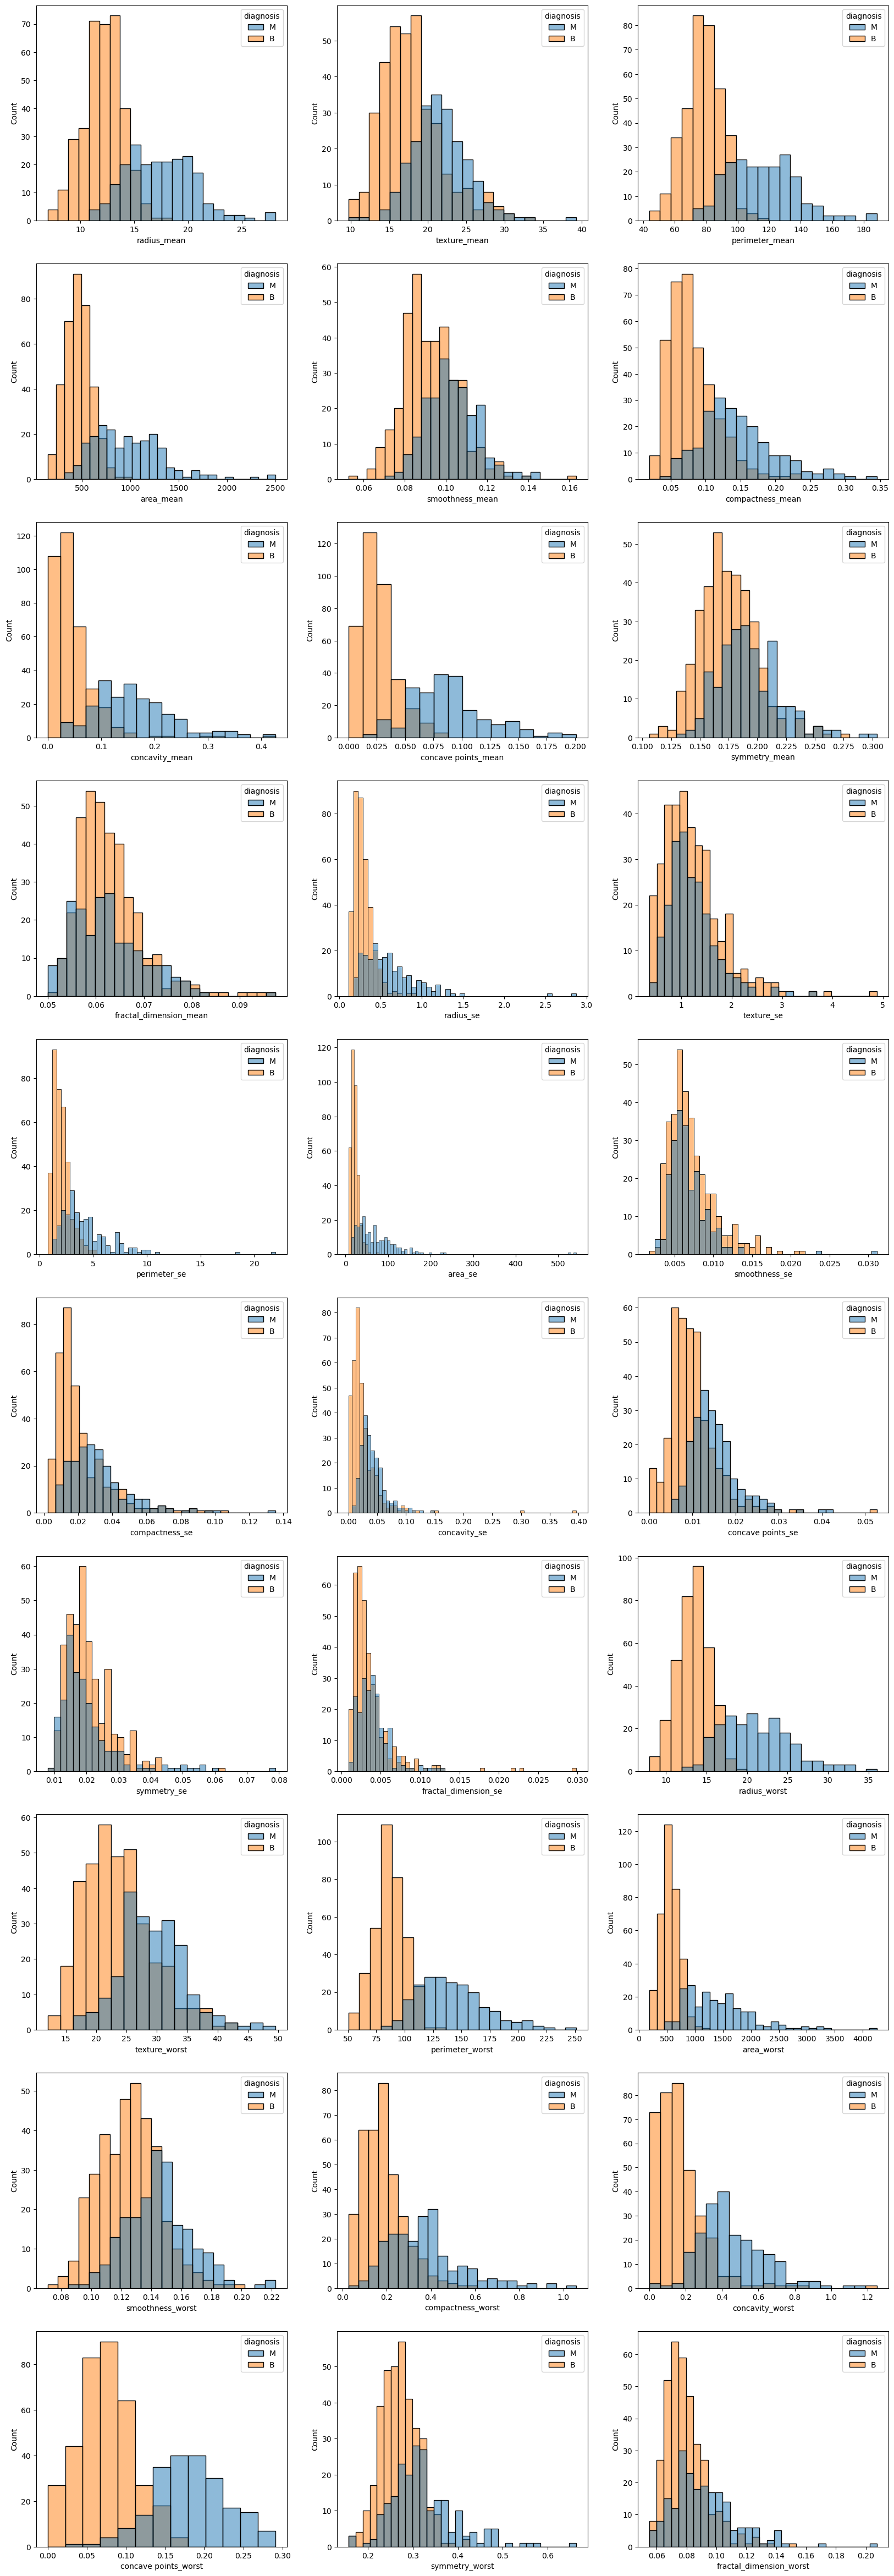

In [24]:
plt.figure(figsize=(20,60))
for i in range(1, len(df.columns)) :
    plt.subplot(10,3,i)
    sns.histplot(x=df.columns[i], data=df, hue="diagnosis")

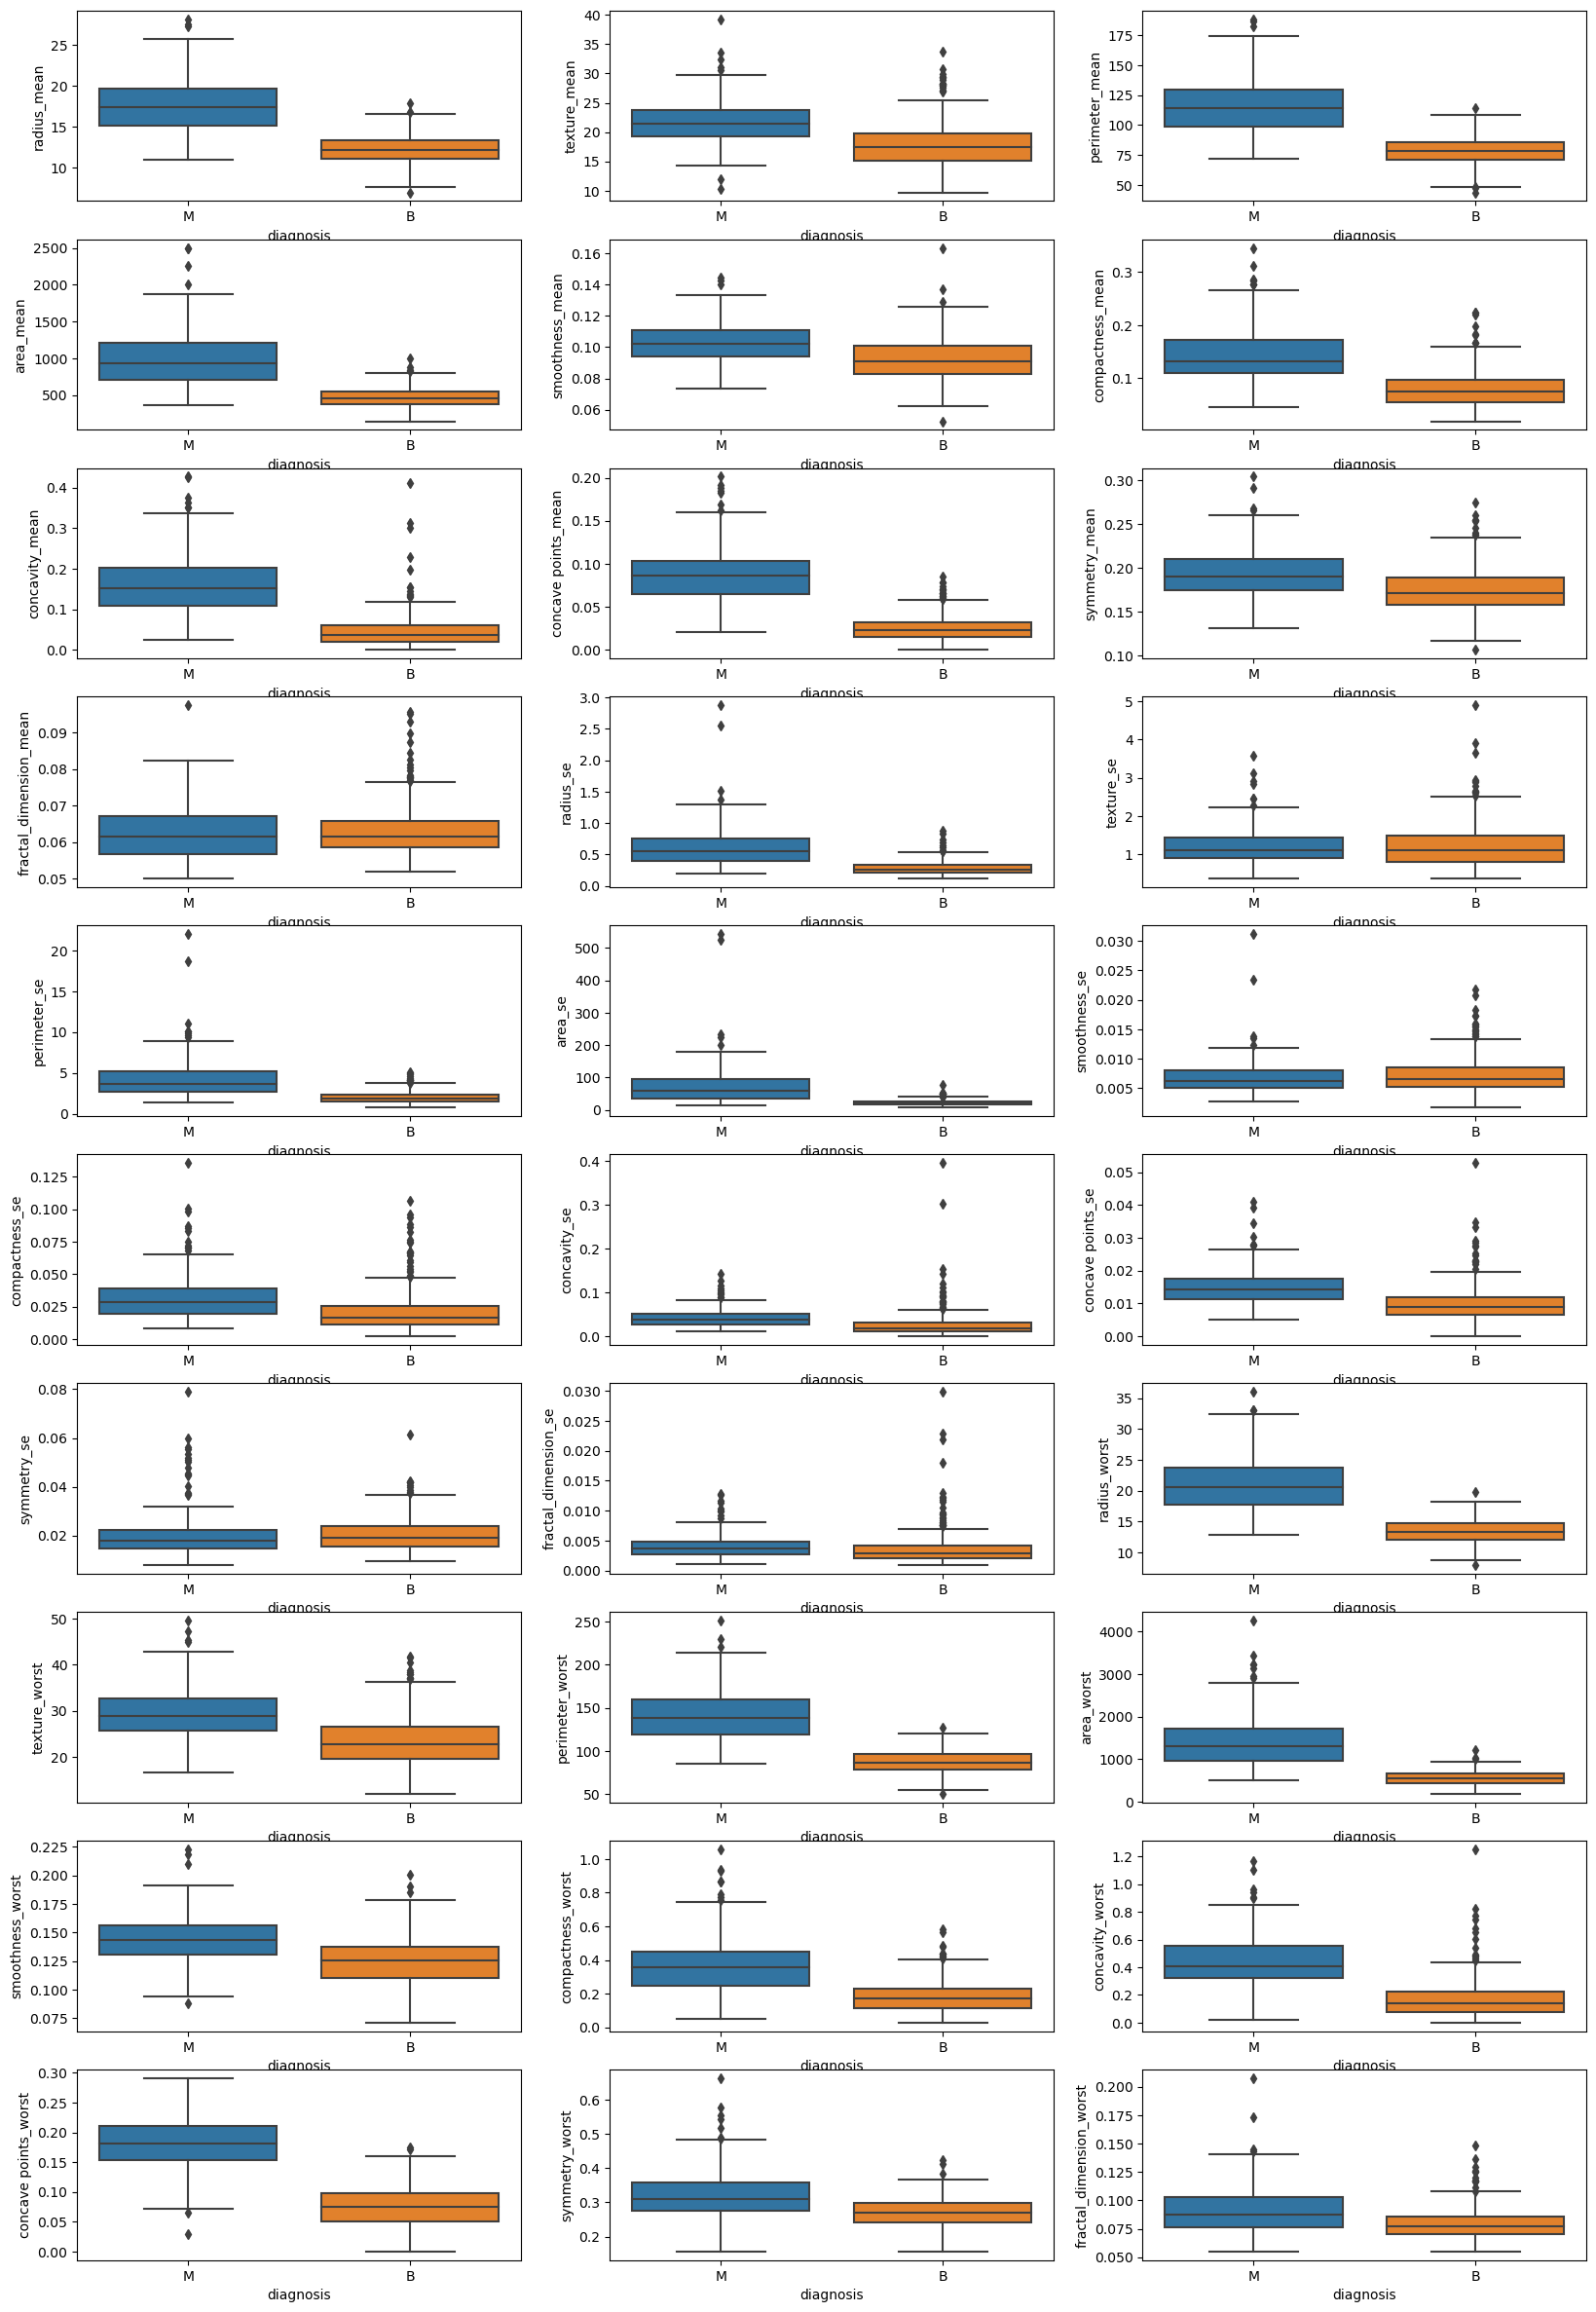

In [25]:
plt.figure(figsize=(20,30))
for i in range(1, len(df.columns)) :
    plt.subplot(10,3,i)
    sns.boxplot(x="diagnosis", y=df.columns[i], data=df)

C:\Users\chauh\AppData\Local\Temp\ipykernel_6096\925344297.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<Axes: >

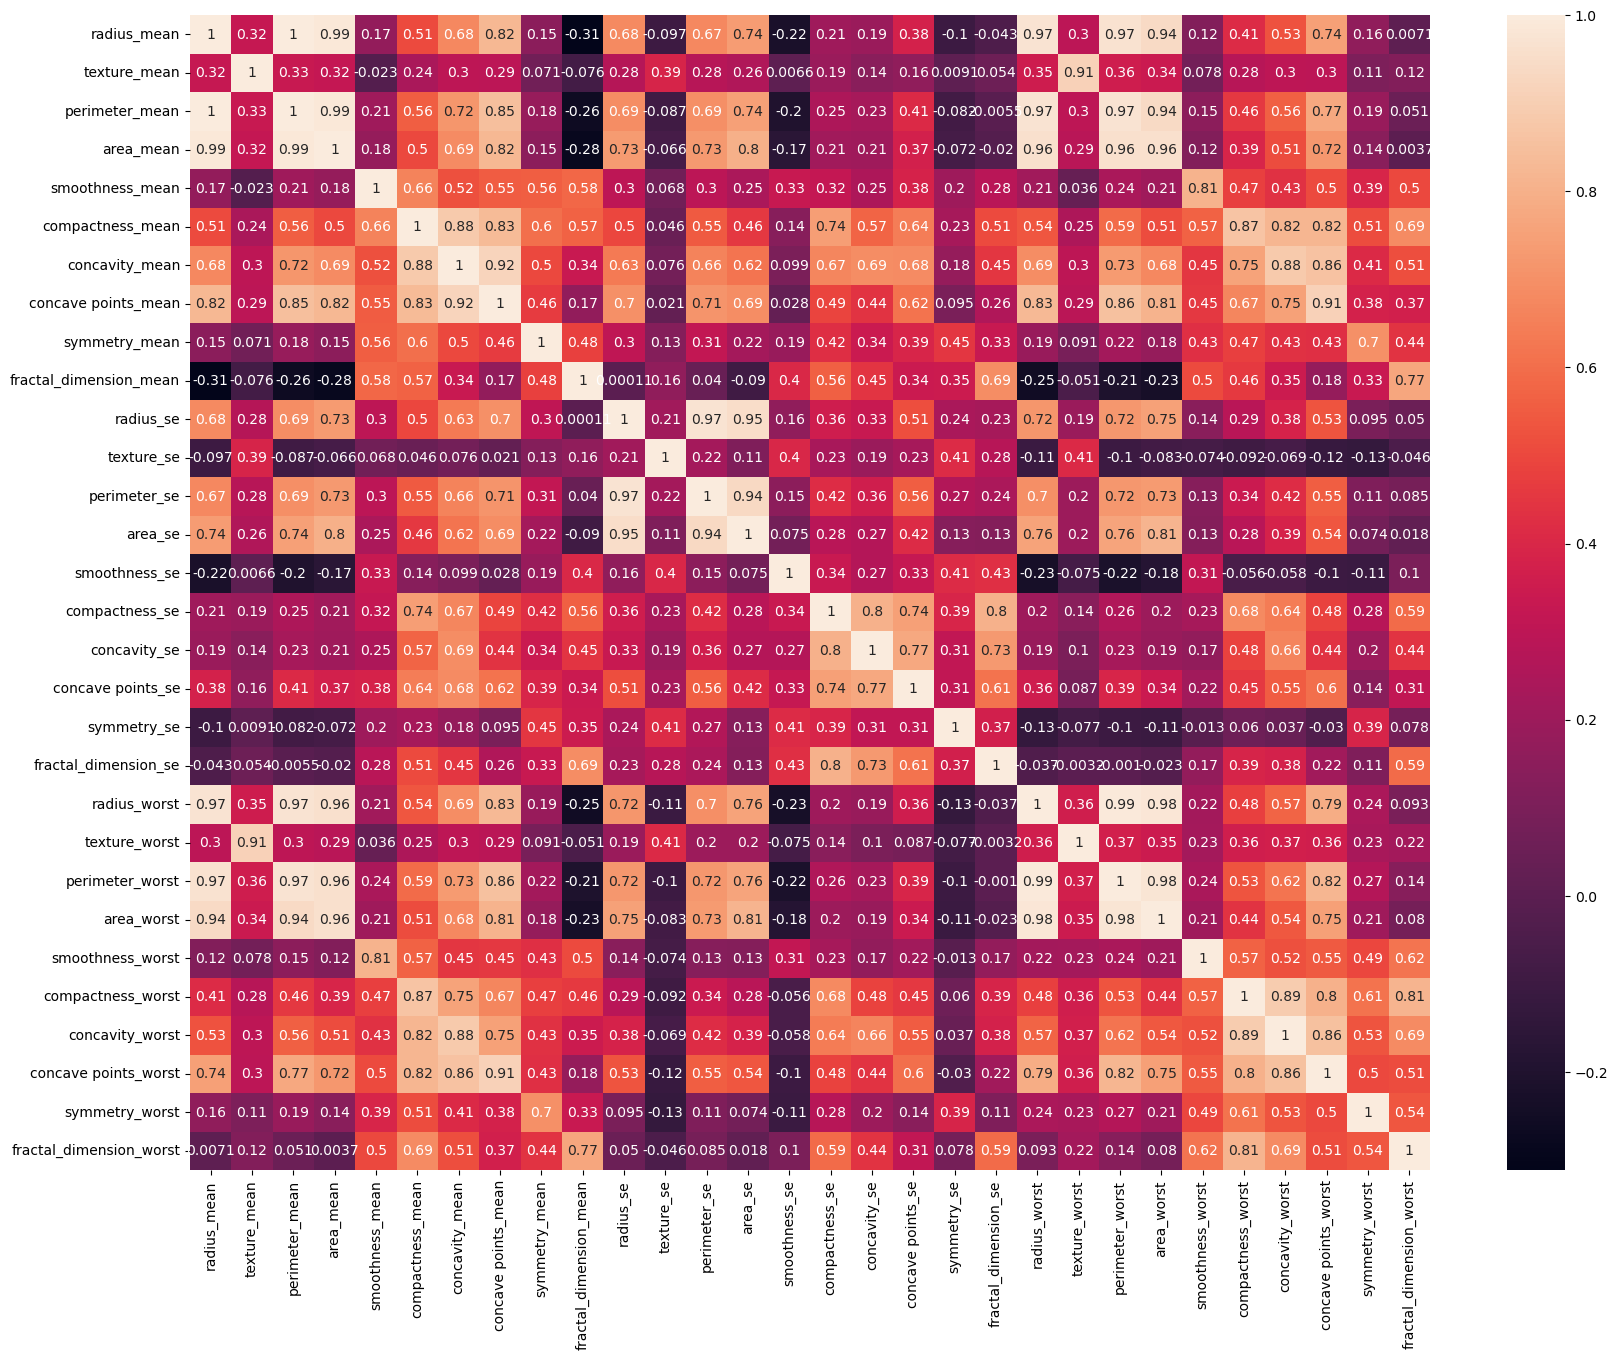

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot= True)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [28]:
df.groupby(['diagnosis']).mean()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [29]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [30]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [33]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [36]:
# seperate data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

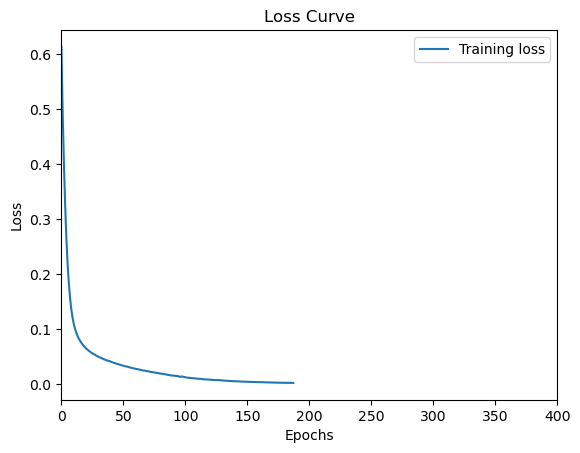

Accuracy: 0.965034965034965


In [38]:
from sklearn.neural_network import MLPClassifier
# Create an MLP object with 2 hidden layers, each with 16 neurons
mlp = MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=1000, activation='relu',
                    solver='adam', batch_size = 32, random_state =42)

# Train the MLP using the input and output datasets
model = mlp.fit(X_train, y_train)

# Plot the training and validation loss
plt.plot(model.loss_curve_, label='Training loss')

if mlp.validation_scores_ != None:
    plt.plot(mlp.validation_scores_)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim(0,400)
plt.show()
accuracy = mlp.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

The loss curve is a graphical representation of the performance of a Deep learning model during the training process. In this case, the curve shows that the loss (also known as error) of the model is continuously decreasing over time. This is a good sign, as it indicates that the model is improving in accuracy and becoming more effective at making predictions with each epoch.

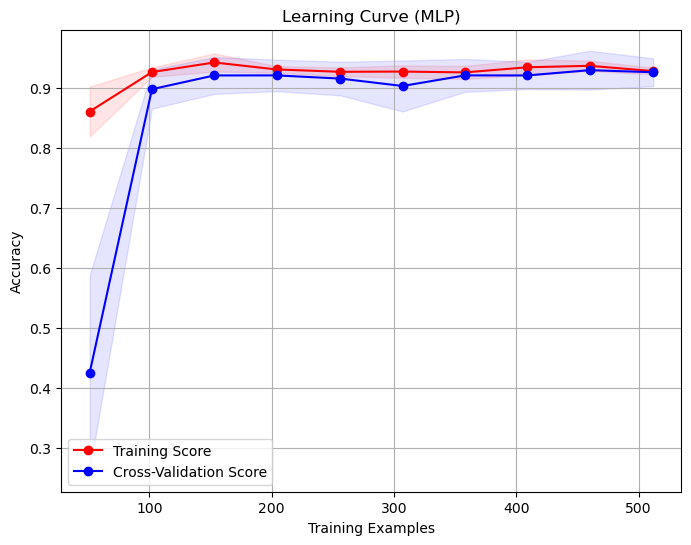

In [39]:
from sklearn.model_selection import learning_curve

# do 10 fold cross validation (cv = 10)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=[.1,.2,.3,.4,.5,.6,.7,.8,.9, 1], cv=10, n_jobs=-1)



# Compute the mean and standard deviation of the train and test scores
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve (MLP)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='b')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='b',
         label='Cross-Validation Score')
plt.legend(loc='best')
plt.show()

The plot above is a learning curve tested using 10-fold cross validation.

The x-axis represents the number of training examples used in the model's training, while the y-axis represents the accuracy of the model on both the training set (in red) and the cross-validation set (in blue). The learning curve is a graphical representation of how the model's accuracy improves as the number of training examples increases. The shaded regions around the curves show the standard deviation of the accuracy scores.

As we can see from the plot of the learning curve above, our model starts out overfitting as the gap between the training score and cross validation score is very large. As the amount of training examples increases, the gap between the training and cross-validation scores decreases which suggests that the model is becoming less overfit as more data is added. Towards the end of training, the gap between the training score and cross-validation score is very small, suggesting that our model properly fits the dataset.

The accuracy of the model on both the training and cross-validation sets appear to platue at around 300+ training examples which suggests that adding more data beyond this point will not lead to significant improvements in the model's accuracy.

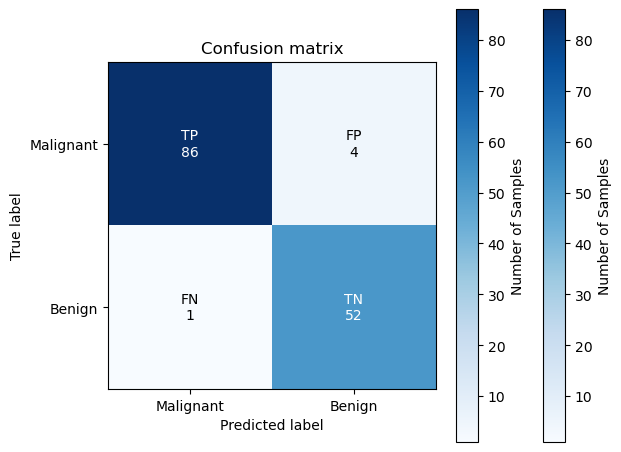

In [40]:
from sklearn.metrics import confusion_matrix
# use the model to predict class labels for test data
y_pred = mlp.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

classes = ['Malignant', 'Benign']
# plot confusion matrix with labels
classes = ['Malignant', 'Benign']
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax, label ="Number of Samples")
ax.figure.colorbar(im, ax=ax, label ="Number of Samples")
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# add text labels to each box
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        label = ''
        if i == 0 and j == 0:
            label = 'TP'
        elif i == 0 and j == 1:
            label = 'FP'
        elif i == 1 and j == 0:
            label = 'FN'
        else:
            label = 'TN'
            
        ax.text(j, i, format(label + '\n' + str(cm[i, j]), 's'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
        

fig.tight_layout()
plt.show()


The figure above is a confusion matrix

A confusion matrix is a table used to evaluate the performance of a classification model. It compares the predicted and actual classes of a set of test data and displays the results in a matrix format. The matrix consists of four quadrants, where the vertical axis shows the actual class labels, and the horizontal axis shows the predicted class labels. The four quadrants are:

1) True Positive (TP): The number of correctly predicted positive samples.
2) False Positive (FP): The number of incorrectly predicted positive samples.
3) False Negative (FN): The number of incorrectly predicted negative samples.
4) True Negative (TN): The number of correctly predicted negative samples.

We can calulate the accuracy of the model with this infomation by dividing the amount of correctly predicted cases to the amount of inccorectly predicted cases

TP+TNTP+FP+FN+TN=107+61107+1+2+61=168171=.982456≈98.25%